# Mid-Bootcamp Project "Housing"

## Setting up Python packages

In [391]:
#Setting up Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.api as sm
import sklearn
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import  mean_squared_error, r2_score, classification_report, accuracy_score, confusion_matrix
from pathlib import Path, PureWindowsPath

## Read data from CSV

In [392]:
filename = PureWindowsPath(r'C:\Users\janek\Desktop\Ironhack\Course\Project\midterm-project\data\regression_data_clean.csv').as_posix()

data =  pd.read_csv(filename)

## Overview of data

In [393]:
data

id      date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520  10/13/14         3       1.00         1180      5650   
1      6414100192   12/9/14         3       2.25         2570      7242   
2      5631500400   2/25/15         2       1.00          770     10000   
3      2487200875   12/9/14         4       3.00         1960      5000   
4      1954400510   2/18/15         3       2.00         1680      8080   
...           ...       ...       ...        ...          ...       ...   
21592   263000018   5/21/14         3       2.50         1530      1131   
21593  6600060120   2/23/15         4       2.50         2310      5813   
21594  1523300141   6/23/14         2       0.75         1020      1350   
21595   291310100   1/16/15         3       2.50         1600      2388   
21596  1523300157  10/15/14         2       0.75         1020      1076   

       floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
0         1.0           0     0          3  ...        1180              0   
1         2.0           0     0          3  ...        2170            400   
2         1.0           0     0          3  ...         770              0   
3         1.0           0     0          5  ...        1050            910   
4         1.0           0     0          3  ...        1680              0   
...       ...         ...   ...        ...  ...         ...            ...   
21592     3.0           0     0          3  ...        1530              0   
21593     2.0           0     0          3  ...        2310              0   
21594     2.0           0     0          3  ...        1020              0   
21595     2.0           0     0          3  ...        1600              0   
21596     2.0           0     0          3  ...        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
1          1951          1991    98125  47.7210 -122.319           1690   
2          1933             0    98028  47.7379 -122.233           2720   
3          1965             0    98136  47.5208 -122.393           1360   
4          1987             0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21592      2009             0    98103  47.6993 -122.346           1530   
21593      2014             0    98146  47.5107 -122.362           1830   
21594      2009             0    98144  47.5944 -122.299           1020   
21595      2004             0    98027  47.5345 -122.069           1410   
21596      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15   price  
0            5650  221900  
1            7639  538000  
2            8062  180000  
3            5000  604000  
4            7503  510000  
...           ...     ...  
21592        1509  360000  
21593        7200  400000  
21594        2007  402101  
21595        1287  400000  
21596        1357  325000  

[21597 rows x 21 columns]

In [394]:
data.describe()

id      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   4.580474e+09      3.373200      2.115826   2080.321850  1.509941e+04   
std    2.876736e+09      0.926299      0.768984    918.106125  4.141264e+04   
min    1.000102e+06      1.000000      0.500000    370.000000  5.200000e+02   
25%    2.123049e+09      3.000000      1.750000   1430.000000  5.040000e+03   
50%    3.904930e+09      3.000000      2.250000   1910.000000  7.618000e+03   
75%    7.308900e+09      4.000000      2.500000   2550.000000  1.068500e+04   
max    9.900000e+09     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       1.494096      0.007547      0.234292      3.409825      7.657915   
std        0.539683      0.086549      0.766390      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21597.000000   21597.000000  21597.000000  21597.000000  21597.000000   
mean    1788.596842     291.725008   1970.999676     84.464787  98077.951845   
std      827.759761     442.667800     29.375234    401.821438     53.513072   
min      370.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15         price  
count  21597.000000  21597.000000   21597.000000   21597.000000  2.159700e+04  
mean      47.560093   -122.213982    1986.620318   12758.283512  5.402966e+05  
std        0.138552      0.140724     685.230472   27274.441950  3.673681e+05  
min       47.155900   -122.519000     399.000000     651.000000  7.800000e+04  
25%       47.471100   -122.328000    1490.000000    5100.000000  3.220000e+05  
50%       47.571800   -122.231000    1840.000000    7620.000000  4.500000e+05  
75%       47.678000   -122.125000    2360.000000   10083.000000  6.450000e+05  
max       47.777600   -121.315000    6210.000000  871200.000000  7.700000e+06

### To get a feeling about content of the features / label, I check the unique values and the count of the same

#### Return the number of unique values of each feature / label

In [395]:
data.nunique()

id               21420
date               372
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
price             3622
dtype: int64

#### Store list of column names in a new variable for later iteration process

In [396]:
collist = data.columns.tolist()

#### Return unique values of all features / label

In [397]:
for column in collist:
    x = column
    print(column, " - Variable \n", "Unique Values: \n")
    print(data[column].unique())
    print("\n\n")

id  - Variable 
 Unique Values: 

[7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]



date  - Variable 
 Unique Values: 

['10/13/14' '12/9/14' '2/25/15' '2/18/15' '5/12/14' '6/27/14' '1/15/15'
 '4/15/15' '3/12/15' '4/3/15' '5/27/14' '5/28/14' '10/7/14' '1/24/15'
 '7/31/14' '5/29/14' '12/5/14' '4/24/15' '5/14/14' '8/26/14' '7/3/14'
 '5/16/14' '11/20/14' '11/3/14' '6/26/14' '12/1/14' '6/24/14' '3/2/15'
 '11/10/14' '12/3/14' '6/13/14' '12/30/14' '2/13/15' '6/20/14' '7/15/14'
 '8/11/14' '7/7/14' '10/28/14' '7/29/14' '7/18/14' '3/25/15' '7/16/14'
 '4/28/15' '3/11/15' '9/16/14' '2/17/15' '12/31/14' '2/5/15' '3/3/15'
 '8/19/14' '4/7/15' '8/27/14' '2/23/15' '12/10/14' '8/28/14' '10/21/14'
 '12/7/14' '6/3/14' '9/9/14' '10/9/14' '8/25/14' '6/12/14' '9/12/14'
 '1/5/15' '6/10/14' '7/10/14' '3/16/15' '11/5/14' '4/20/15' '6/9/14'
 '3/23/15' '12/2/14' '12/22/14' '1/28/15' '6/2/14' '11/14/14' '6/18/14'
 '5/19/14' '9/4/14' '5/22/14' '2/26/15' '7/25/14' '12/23/14' '9/8/14'
 '3/30

#### Checking the shape of the original data set and data types per column

In [398]:
data.shape

(21597, 21)

In [399]:
data.dtypes

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

#### Checking for null and NaN / blank values

In [400]:
data.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [401]:
data.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [402]:
data.eq(' ').sum()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

#### Now checking for correlation between variables in data set

In [403]:
data.corr()

id  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
id             1.000000  0.001150   0.005162    -0.012241 -0.131911  0.018608   
bedrooms       0.001150  1.000000   0.514508     0.578212  0.032471  0.177944   
bathrooms      0.005162  0.514508   1.000000     0.755758  0.088373  0.502582   
sqft_living   -0.012241  0.578212   0.755758     1.000000  0.173453  0.353953   
sqft_lot      -0.131911  0.032471   0.088373     0.173453  1.000000 -0.004814   
floors         0.018608  0.177944   0.502582     0.353953 -0.004814  1.000000   
waterfront    -0.002727 -0.006834   0.063744     0.103854  0.021632  0.023755   
view           0.011536  0.080008   0.188386     0.284709  0.074900  0.028814   
condition     -0.023803  0.026496  -0.126479    -0.059445 -0.008830 -0.264075   
grade          0.008188  0.356563   0.665838     0.762779  0.114731  0.458794   
sqft_above    -0.010799  0.479386   0.686668     0.876448  0.184139  0.523989   
sqft_basement -0.005193  0.302808   0.283440     0.435130  0.015418 -0.245715   
yr_built       0.021617  0.155670   0.507173     0.318152  0.052946  0.489193   
yr_renovated  -0.016925  0.018389   0.050544     0.055308  0.007686  0.006427   
zipcode       -0.008211 -0.154092  -0.204786    -0.199802 -0.129586 -0.059541   
lat           -0.001798 -0.009951   0.024280     0.052155 -0.085514  0.049239   
long           0.020672  0.132054   0.224903     0.241214  0.230227  0.125943   
sqft_living15 -0.002701  0.393406   0.569884     0.756402  0.144763  0.280102   
sqft_lot15    -0.138557  0.030690   0.088303     0.184342  0.718204 -0.010722   
price         -0.016772  0.308787   0.525906     0.701917  0.089876  0.256804   

               waterfront      view  condition     grade  sqft_above  \
id              -0.002727  0.011536  -0.023803  0.008188   -0.010799   
bedrooms        -0.006834  0.080008   0.026496  0.356563    0.479386   
bathrooms        0.063744  0.188386  -0.126479  0.665838    0.686668   
sqft_living      0.103854  0.284709  -0.059445  0.762779    0.876448   
sqft_lot         0.021632  0.074900  -0.008830  0.114731    0.184139   
floors           0.023755  0.028814  -0.264075  0.458794    0.523989   
waterfront       1.000000  0.401971   0.016611  0.082888    0.072109   
view             0.401971  1.000000   0.045999  0.251728    0.167609   
condition        0.016611  0.045999   1.000000 -0.146896   -0.158904   
grade            0.082888  0.251728  -0.146896  1.000000    0.756073   
sqft_above       0.072109  0.167609  -0.158904  0.756073    1.000000   
sqft_basement    0.080559  0.277078   0.173849  0.168220   -0.052156   
yr_built        -0.026153 -0.053636  -0.361592  0.447865    0.424037   
yr_renovated     0.092873  0.103951  -0.060788  0.014261    0.023251   
zipcode          0.030272  0.084622   0.002888 -0.185771   -0.261570   
lat             -0.014306  0.005871  -0.015102  0.113575   -0.001199   
long            -0.041904 -0.078107  -0.105877  0.200341    0.344842   
sqft_living15    0.086507  0.280681  -0.093072  0.713867    0.731767   
sqft_lot15       0.030781  0.072904  -0.003126  0.120981    0.195077   
price            0.266398  0.397370   0.036056  0.667951    0.605368   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
id                 -0.005193  0.021617     -0.016925 -0.008211 -0.001798   
bedrooms            0.302808  0.155670      0.018389 -0.154092 -0.009951   
bathrooms           0.283440  0.507173      0.050544 -0.204786  0.024280   
sqft_living         0.435130  0.318152      0.055308 -0.199802  0.052155   
sqft_lot            0.015418  0.052946      0.007686 -0.129586 -0.085514   
floors             -0.245715  0.489193      0.006427 -0.059541  0.049239   
waterfront          0.080559 -0.026153      0.092873  0.030272 -0.014306   
view                0.277078 -0.053636      0.103951  0.084622  0.005871   
condition           0.173849 -0.361592     -0.060788  0.002888 -0.015102   
grade               0.168220  0.447865      0.

#### Creating a correlation matrix with heatmap for better visual understanding of correlation

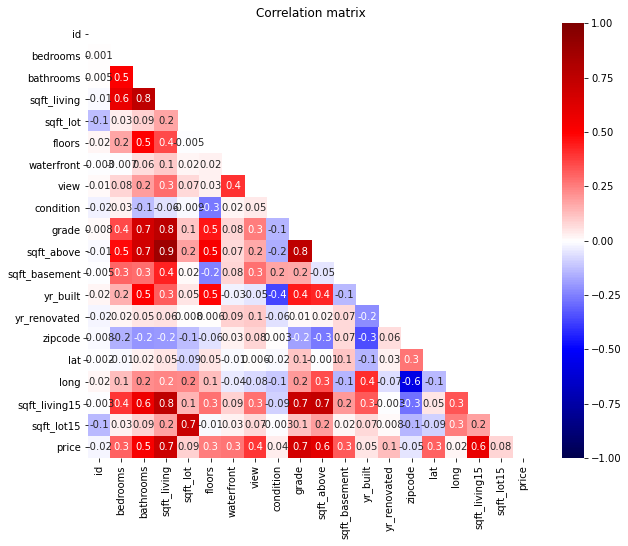

In [404]:
correlation_matrix = data.corr()
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'seismic', cbar_kws= {'orientation': 'vertical'})
plt.title("Correlation matrix")
plt.show()

#### Check features with similar names as well as price for correlation

In [405]:
datasqft = data[['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'price']]
datasqft.corr()

sqft_living  sqft_living15  sqft_lot  sqft_lot15     price
sqft_living       1.000000       0.756402  0.173453    0.184342  0.701917
sqft_living15     0.756402       1.000000  0.144763    0.183515  0.585241
sqft_lot          0.173453       0.144763  1.000000    0.718204  0.089876
sqft_lot15        0.184342       0.183515  0.718204    1.000000  0.082845
price             0.701917       0.585241  0.089876    0.082845  1.000000

#### To check potential issues with normality / skewness within data, I create histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002231CD58D60>,
      dtype=object)

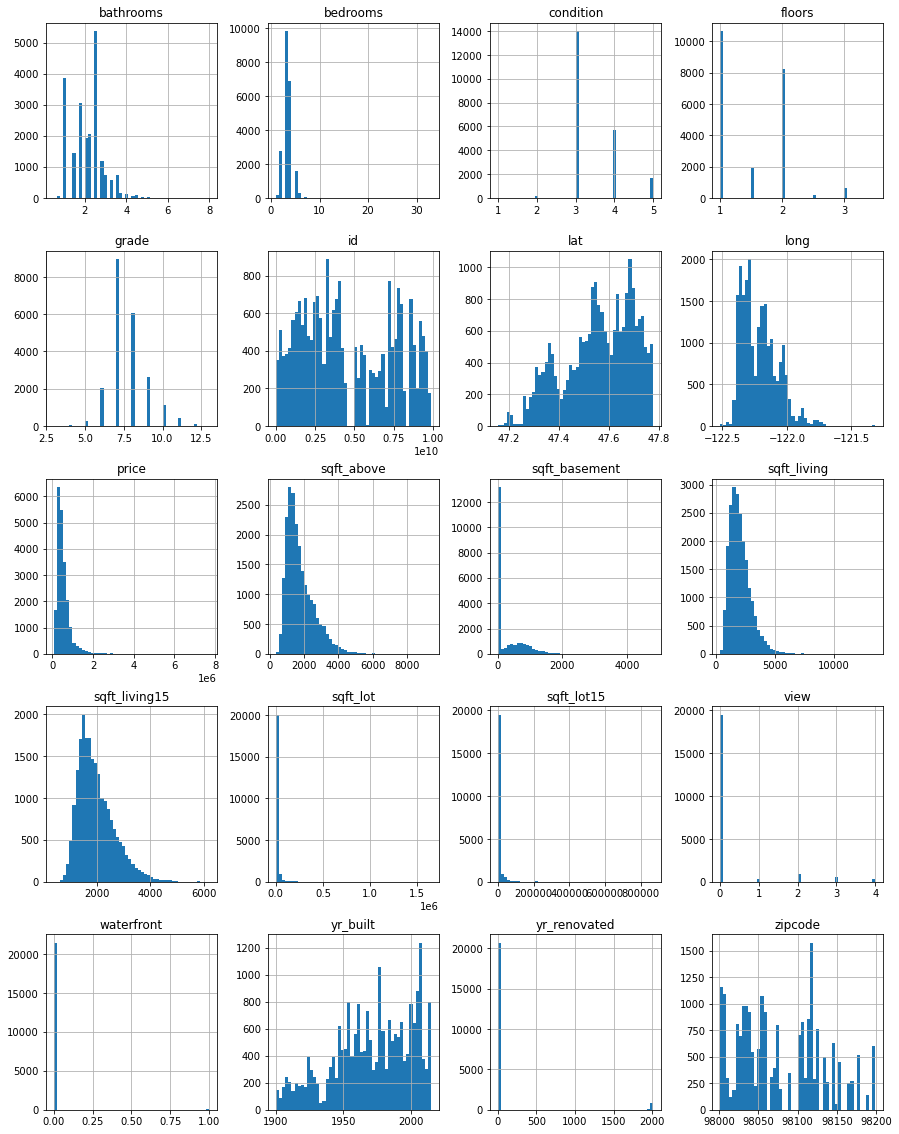

In [406]:
data.hist(figsize = (15,20), bins=50)

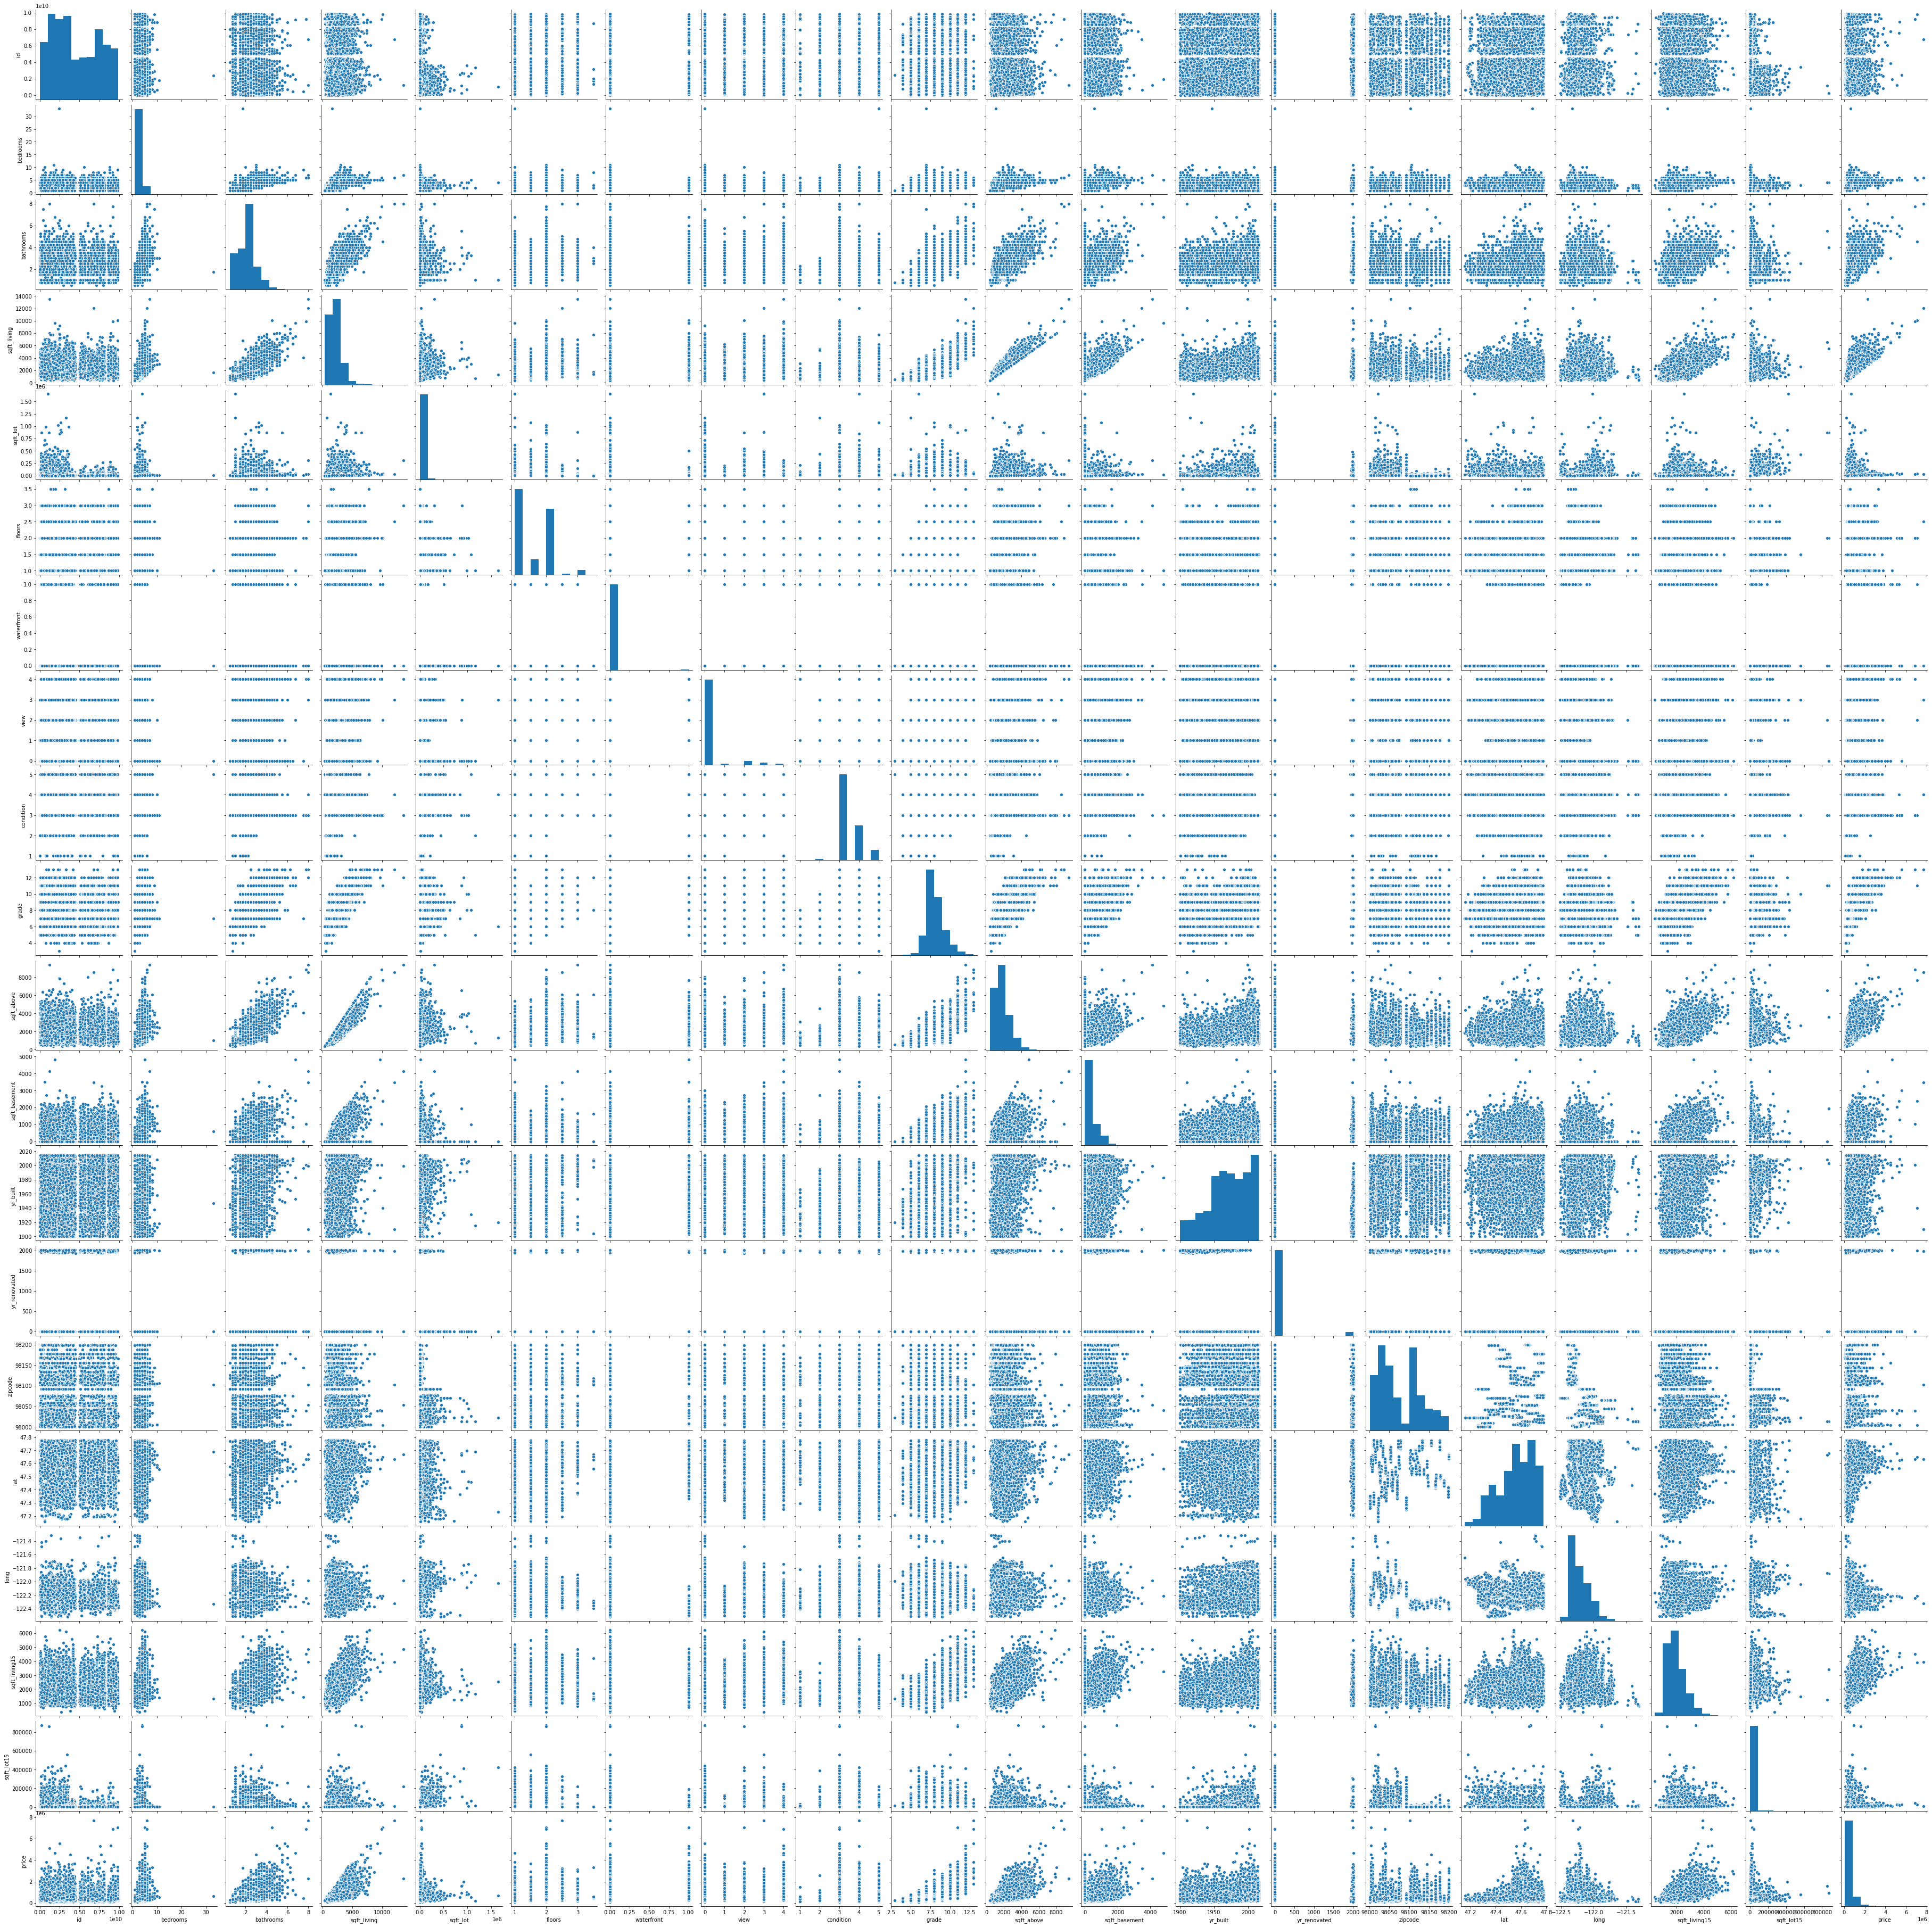

In [191]:
sns.pairplot(data)

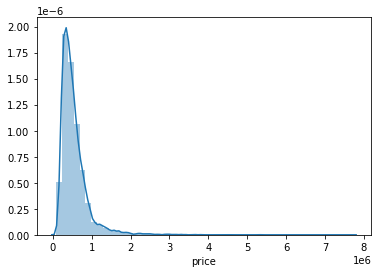

In [407]:
sns.distplot(data['price'])
plt.show()

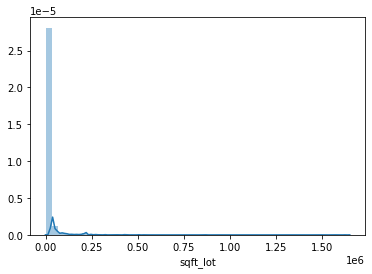

In [408]:
sns.distplot(data['sqft_lot'])
plt.show()

### Cleaning Data

#### Remove unreasonable outlier with characteristics bedroom == 33

In [547]:
df = data[data['bedrooms'] < 33].copy()
df.shape

(21596, 21)

#### Drop columns id, lat, long

In [548]:
df = df.drop(columns=['id', 'lat', 'long'])

In [549]:
df

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      10/13/14         3       1.00         1180      5650     1.0   
1       12/9/14         3       2.25         2570      7242     2.0   
2       2/25/15         2       1.00          770     10000     1.0   
3       12/9/14         4       3.00         1960      5000     1.0   
4       2/18/15         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21592   5/21/14         3       2.50         1530      1131     3.0   
21593   2/23/15         4       2.50         2310      5813     2.0   
21594   6/23/14         2       0.75         1020      1350     2.0   
21595   1/16/15         3       2.50         1600      2388     2.0   
21596  10/15/14         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
1               0     0          3      7        2170            400   
2               0     0          3      6         770              0   
3               0     0          5      7        1050            910   
4               0     0          3      8        1680              0   
...           ...   ...        ...    ...         ...            ...   
21592           0     0          3      8        1530              0   
21593           0     0          3      8        2310              0   
21594           0     0          3      7        1020              0   
21595           0     0          3      8        1600              0   
21596           0     0          3      7        1020              0   

       yr_built  yr_renovated  zipcode  sqft_living15  sqft_lot15   price  
0          1955             0    98178           1340        5650  221900  
1          1951          1991    98125           1690        7639  538000  
2          1933             0    98028           2720        8062  180000  
3          1965             0    98136           1360        5000  604000  
4          1987             0    98074           1800        7503  510000  
...         ...           ...      ...            ...         ...     ...  
21592      2009             0    98103           1530        1509  360000  
21593      2014             0    98146           1830        7200  400000  
21594      2009             0    98144           1020        2007  402101  
21595      2004             0    98027           1410        1287  400000  
21596      2008             0    98144           1020        1357  325000  

[21596 rows x 18 columns]

### Analyzing some of the continuous data before further manipulation

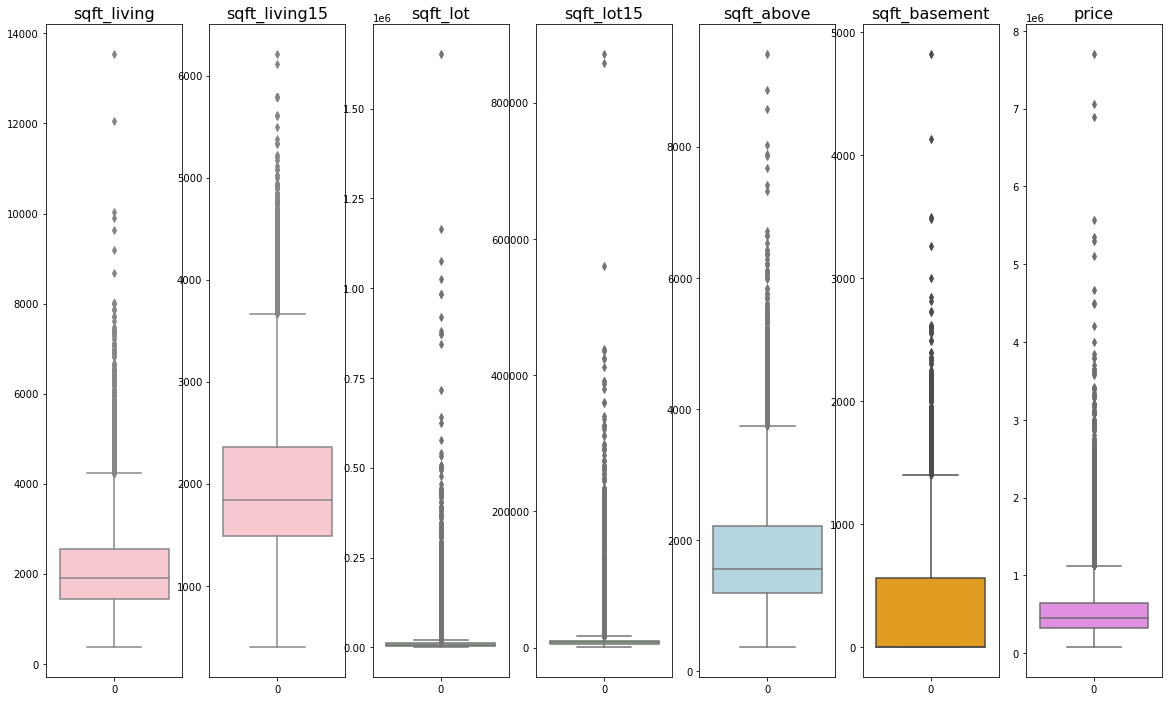

In [550]:
continuous_df = df[['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above', 'sqft_basement', 'price']]

continuous = list(continuous_df.columns.tolist())

box_colors = ["pink", "pink", "lightgreen", "lightgreen", "lightblue", "orange", "violet"]

f, ax = plt.subplots(1, 7, figsize=(20,12))


for i, col in enumerate(continuous):
    sns.boxplot(data = continuous_df[col], ax = ax[i], color = box_colors[i])
    ax[i].set_title(col, fontsize = 16)
plt.show();

## Feature selection and model building
Now I will work in an iterative process to select the right features and increase the accuracy of my models. 

#### Create a baseline model for comparison

In [551]:
df

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      10/13/14         3       1.00         1180      5650     1.0   
1       12/9/14         3       2.25         2570      7242     2.0   
2       2/25/15         2       1.00          770     10000     1.0   
3       12/9/14         4       3.00         1960      5000     1.0   
4       2/18/15         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21592   5/21/14         3       2.50         1530      1131     3.0   
21593   2/23/15         4       2.50         2310      5813     2.0   
21594   6/23/14         2       0.75         1020      1350     2.0   
21595   1/16/15         3       2.50         1600      2388     2.0   
21596  10/15/14         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
1               0     0          3      7        2170            400   
2               0     0          3      6         770              0   
3               0     0          5      7        1050            910   
4               0     0          3      8        1680              0   
...           ...   ...        ...    ...         ...            ...   
21592           0     0          3      8        1530              0   
21593           0     0          3      8        2310              0   
21594           0     0          3      7        1020              0   
21595           0     0          3      8        1600              0   
21596           0     0          3      7        1020              0   

       yr_built  yr_renovated  zipcode  sqft_living15  sqft_lot15   price  
0          1955             0    98178           1340        5650  221900  
1          1951          1991    98125           1690        7639  538000  
2          1933             0    98028           2720        8062  180000  
3          1965             0    98136           1360        5000  604000  
4          1987             0    98074           1800        7503  510000  
...         ...           ...      ...            ...         ...     ...  
21592      2009             0    98103           1530        1509  360000  
21593      2014             0    98146           1830        7200  400000  
21594      2009             0    98144           1020        2007  402101  
21595      2004             0    98027           1410        1287  400000  
21596      2008             0    98144           1020        1357  325000  

[21596 rows x 18 columns]

In [552]:
    OX = df.drop(['date', 'price'], axis=1)
    y = df['price']  ## Y usually means our output/dependent variable
    OX = sm.add_constant(OX) ## let's add an intercept (beta_0) to our model
    # Note the difference in argument order
    est = sm.OLS(y, OX) ## sm.OLS(output, input)
    est2 = est.fit()
    # Print out the statistics
    est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     2731.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        01:22:05   Log-Likelihood:            -2.9589e+05
No. Observations:               21596   AIC:                         5.918e+05
Df Residuals:                   21580   BIC:                         5.919e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.316e+06   3.13e+06      2.339      0.019    1.19e+06    1.34e+07
bedrooms       -4.31e+04   2123.055    -20.303      0.000   -4.73e+04   -3.89e+04
bathrooms       4.72e+04   3509.128     13.450      0.000    4.03e+04    5.41e+04
sqft_living     110.6302      2.455     45.067      0.000     105.819     115.442
sqft_lot         -0.0045      0.051     -0.088      0.930      -0.105       0.096
floors          2.66e+04   3838.330      6.929      0.000    1.91e+04    3.41e+04
waterfront     5.778e+05   1.86e+04     31.028      0.000    5.41e+05    6.14e+05
view           4.291e+04   2284.602     18.781      0.000    3.84e+04    4.74e+04
condition      1.976e+04   2520.708      7.839      0.000    1.48e+04    2.47e+04
grade          1.203e+05   2263.438     53.135      0.000    1.16e+05    1.25e+05
sqft_above       52.2149      2.372     22.015      0.000      47.566      56.864
sqft_basement    58.4082      2.807     20.805      0.000      52.905      63.911
yr_built      -3595.3368     74.601    -48.194      0.000   -3741.560   -3449.113
yr_renovated      9.8580      3.916      2.517      0.012       2.182      17.534
zipcode         -10.8943     31.386     -0.347      0.729     -72.413      50.625
sqft_living15    24.1240      3.652      6.607      0.000      16.967      31.281
sqft_lot15       -0.5678      0.078     -7.243      0.000      -0.722      -0.414
==============================================================================
Omnibus:                    16202.628   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1172315.895
Skew:                           2.999   Prob(JB):                         0.00
Kurtosis:                      38.593   Cond. No.                     4.67e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  1e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Split the data set into a set with independent features and one with the target value "Price"

In [553]:
X = df.drop(['price', 'date'], axis=1)

y = df['price']

### T-T-Split

In [554]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 1/3, random_state=42)

In [555]:
print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(14397, 16) (14397,)
(7199, 16) (7199,)


### Applying linear models

In [556]:
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

linear_models = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
models_automation(linear_models, X_train, y_train)

LinearRegression: Train -> 0.6636640558475081, Test -> 0.6359100248149501
Lasso: Train -> 0.6636640547124674, Test -> 0.6359111741700896
Ridge: Train -> 0.6636621460370278, Test -> 0.6359473375759668
ElasticNet: Train -> 0.6237145215661908, Test -> 0.6067360303177723


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 300824920305752.8, tolerance: 194205229255.2316
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 388995769656439.9, tolerance: 194205229255.2316
  model = cd_fast.enet_coordinate_descent(


## Iteration 2: 

#### Remove sqft_lot, sqft_living and zipcode from data set

In [561]:
df2 = df.drop(['sqft_living', 'sqft_lot', 'zipcode'], axis=1).copy()
df2

date  bedrooms  bathrooms  floors  waterfront  view  condition  \
0      10/13/14         3       1.00     1.0           0     0          3   
1       12/9/14         3       2.25     2.0           0     0          3   
2       2/25/15         2       1.00     1.0           0     0          3   
3       12/9/14         4       3.00     1.0           0     0          5   
4       2/18/15         3       2.00     1.0           0     0          3   
...         ...       ...        ...     ...         ...   ...        ...   
21592   5/21/14         3       2.50     3.0           0     0          3   
21593   2/23/15         4       2.50     2.0           0     0          3   
21594   6/23/14         2       0.75     2.0           0     0          3   
21595   1/16/15         3       2.50     2.0           0     0          3   
21596  10/15/14         2       0.75     2.0           0     0          3   

       grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          7        1180              0      1955             0   
1          7        2170            400      1951          1991   
2          6         770              0      1933             0   
3          7        1050            910      1965             0   
4          8        1680              0      1987             0   
...      ...         ...            ...       ...           ...   
21592      8        1530              0      2009             0   
21593      8        2310              0      2014             0   
21594      7        1020              0      2009             0   
21595      8        1600              0      2004             0   
21596      7        1020              0      2008             0   

       sqft_living15  sqft_lot15   price  
0               1340        5650  221900  
1               1690        7639  538000  
2               2720        8062  180000  
3               1360        5000  604000  
4               1800        7503  510000  
...              ...         ...     ...  
21592           1530        1509  360000  
21593           1830        7200  400000  
21594           1020        2007  402101  
21595           1410        1287  400000  
21596           1020        1357  325000  

[21596 rows x 15 columns]

In [562]:
    OX = df2.drop(['date', 'price'], axis=1)
    y = df2['price']  ## Y usually means our output/dependent variable
    OX = sm.add_constant(OX) ## let's add an intercept (beta_0) to our model
    # Note the difference in argument order
    est = sm.OLS(y, OX) ## sm.OLS(output, input)
    est2 = est.fit()
    # Print out the statistics
    est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     3151.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        01:23:03   Log-Likelihood:            -2.9589e+05
No. Observations:               21596   AIC:                         5.918e+05
Df Residuals:                   21582   BIC:                         5.919e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.231e+06   1.38e+05     45.024      0.000    5.96e+06     6.5e+06
bedrooms      -4.305e+04   2118.176    -20.326      0.000   -4.72e+04   -3.89e+04
bathrooms       4.72e+04   3508.838     13.453      0.000    4.03e+04    5.41e+04
floors         2.639e+04   3783.783      6.974      0.000     1.9e+04    3.38e+04
waterfront     5.779e+05   1.86e+04     31.042      0.000    5.41e+05    6.14e+05
view           4.282e+04   2271.189     18.854      0.000    3.84e+04    4.73e+04
condition      1.989e+04   2495.534      7.968      0.000     1.5e+04    2.48e+04
grade          1.202e+05   2258.018     53.239      0.000    1.16e+05    1.25e+05
sqft_above      162.8722      3.913     41.623      0.000     155.202     170.542
sqft_basement   168.8718      4.687     36.030      0.000     159.685     178.059
yr_built      -3587.2965     70.969    -50.548      0.000   -3726.400   -3448.193
yr_renovated      9.9369      3.910      2.542      0.011       2.273      17.600
sqft_living15    24.3507      3.595      6.774      0.000      17.305      31.397
sqft_lot15       -0.5711      0.056    -10.215      0.000      -0.681      -0.461
==============================================================================
Omnibus:                    16208.223   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1173415.094
Skew:                           3.000   Prob(JB):                         0.00
Kurtosis:                      38.609   Cond. No.                     2.84e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Split the data set into a set with independent features and one with the target value "Price"

In [563]:
X = df2.drop(['price', 'date'], axis=1)

y = df2['price']

### T-T-Split

In [564]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 1/3, random_state=42)

In [565]:
print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(14397, 13) (14397,)
(7199, 13) (7199,)


### Applying linear models

In [566]:
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

linear_models = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
models_automation(linear_models, X_train, y_train)

LinearRegression: Train -> 0.6636613652385353, Test -> 0.6359269660890049
Lasso: Train -> 0.6636613641050488, Test -> 0.6359281293198056
Ridge: Train -> 0.6636594555050579, Test -> 0.635964157416276
ElasticNet: Train -> 0.6237601381125211, Test -> 0.6071291978530784


## Iteration 3: 

In [568]:
df3 = df2.copy()

#### Create a dummy variable for renovation work conducted (True=1, False=0)

In [569]:
df3['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

In [570]:
df3['renovated'] = df3['yr_renovated'] > 0
df3['renovated'] = df3['renovated'].astype(int)

In [571]:
df3['renovated'].unique()

array([0, 1])

In [572]:
df3 = df3.drop('yr_renovated', axis=1)

#### Create a dummy variable for basement (if basement is part of property = 1) and drop sqft_basement

In [573]:
df3['basement'] = df3['sqft_basement'] > 0
df3['basement'] = df3['basement'].astype(int)

df3 = df3.drop('sqft_basement', axis=1)

In [574]:
df3.head()

date  bedrooms  bathrooms  floors  waterfront  view  condition  grade  \
0  10/13/14         3       1.00     1.0           0     0          3      7   
1   12/9/14         3       2.25     2.0           0     0          3      7   
2   2/25/15         2       1.00     1.0           0     0          3      6   
3   12/9/14         4       3.00     1.0           0     0          5      7   
4   2/18/15         3       2.00     1.0           0     0          3      8   

   sqft_above  yr_built  sqft_living15  sqft_lot15   price  renovated  \
0        1180      1955           1340        5650  221900          0   
1        2170      1951           1690        7639  538000          1   
2         770      1933           2720        8062  180000          0   
3        1050      1965           1360        5000  604000          0   
4        1680      1987           1800        7503  510000          0   

   basement  
0         0  
1         1  
2         0  
3         1  
4         0

In [575]:
    OX = df3.drop(['date', 'price'], axis=1)
    y = df3['price']  ## Y usually means our output/dependent variable
    OX = sm.add_constant(OX) ## let's add an intercept (beta_0) to our model
    # Note the difference in argument order
    est = sm.OLS(y, OX) ## sm.OLS(output, input)
    est2 = est.fit()
    # Print out the statistics
    est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     3026.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        01:23:45   Log-Likelihood:            -2.9617e+05
No. Observations:               21596   AIC:                         5.924e+05
Df Residuals:                   21582   BIC:                         5.925e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.352e+06   1.41e+05     45.141      0.000    6.08e+06    6.63e+06
bedrooms      -3.236e+04   2099.709    -15.413      0.000   -3.65e+04   -2.82e+04
bathrooms      6.358e+04   3511.139     18.108      0.000    5.67e+04    7.05e+04
floors         7393.8601   3750.118      1.972      0.049      43.352    1.47e+04
waterfront     5.846e+05   1.89e+04     30.990      0.000    5.48e+05    6.22e+05
view           5.063e+04   2280.067     22.207      0.000    4.62e+04    5.51e+04
condition      2.477e+04   2525.911      9.805      0.000    1.98e+04    2.97e+04
grade          1.242e+05   2293.623     54.151      0.000     1.2e+05    1.29e+05
sqft_above      151.4438      4.053     37.367      0.000     143.500     159.388
yr_built      -3691.9248     72.027    -51.257      0.000   -3833.104   -3550.746
sqft_living15    35.0915      3.614      9.709      0.000      28.007      42.176
sqft_lot15       -0.5133      0.057     -9.066      0.000      -0.624      -0.402
renovated      2.438e+04   7909.282      3.082      0.002    8874.579    3.99e+04
basement       1.062e+05   4005.137     26.516      0.000    9.83e+04    1.14e+05
==============================================================================
Omnibus:                    17190.548   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1482089.826
Skew:                           3.243   Prob(JB):                         0.00
Kurtosis:                      43.062   Cond. No.                     2.85e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Split the data set into a set with independent features and one with the target value "Price"

In [576]:
X = df3.drop(['price', 'date'], axis=1)

y = df3['price']

### T-T-Split

In [577]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 1/3, random_state=42)

In [578]:
print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(14397, 13) (14397,)
(7199, 13) (7199,)


### Applying linear models

In [579]:
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

linear_models = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
models_automation(linear_models, X_train, y_train)

LinearRegression: Train -> 0.6538757736395965, Test -> 0.6275479929473504
Lasso: Train -> 0.6538757723381463, Test -> 0.6275487642861766
Ridge: Train -> 0.6538738048120215, Test -> 0.6275881912394021
ElasticNet: Train -> 0.6023625351144999, Test -> 0.5851794892578026


## Iteration 4: 

In [581]:
df4 = df3.copy()

### Create dummy variables for year and drop yr_built

#### Create dummy variables for when a house has been built

* Feature cata: 1 if house has been built before the year 2000
* Feature catb: 1 if house has been built between the year 2000 and 2010 (inclusive)
* Feature catc: 1 if house has been built after the year 2010

In [582]:
df4['cata'] = ((df4['yr_built'] > 0) & (df4['yr_built'] < 2000))
df4['cata'] = df4['cata'].astype(int)

df4['catb'] = ((df4['yr_built'] > 0) & (df4['yr_built'] > 1999) & (df4['yr_built'] < 2011))
df4['catb'] = df4['catb'].astype(int)

df4['catc'] = ((df4['yr_built'] > 0) & (df4['yr_built'] > 2010))
df4['catc'] = df4['catc'].astype(int)

Check all unique values of the newly created variables

In [583]:
print(df4['cata'].unique(), df4['catb'].unique(), df4['catc'].unique())

[1 0] [0 1] [0 1]


In [584]:
df4.columns.tolist()

['date',
 'bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'yr_built',
 'sqft_living15',
 'sqft_lot15',
 'price',
 'renovated',
 'basement',
 'cata',
 'catb',
 'catc']

In [585]:
df4 = df4.drop('yr_built', axis=1)

In [586]:
df4

date  bedrooms  bathrooms  floors  waterfront  view  condition  \
0      10/13/14         3       1.00     1.0           0     0          3   
1       12/9/14         3       2.25     2.0           0     0          3   
2       2/25/15         2       1.00     1.0           0     0          3   
3       12/9/14         4       3.00     1.0           0     0          5   
4       2/18/15         3       2.00     1.0           0     0          3   
...         ...       ...        ...     ...         ...   ...        ...   
21592   5/21/14         3       2.50     3.0           0     0          3   
21593   2/23/15         4       2.50     2.0           0     0          3   
21594   6/23/14         2       0.75     2.0           0     0          3   
21595   1/16/15         3       2.50     2.0           0     0          3   
21596  10/15/14         2       0.75     2.0           0     0          3   

       grade  sqft_above  sqft_living15  sqft_lot15   price  renovated  \
0          7        1180           1340        5650  221900          0   
1          7        2170           1690        7639  538000          1   
2          6         770           2720        8062  180000          0   
3          7        1050           1360        5000  604000          0   
4          8        1680           1800        7503  510000          0   
...      ...         ...            ...         ...     ...        ...   
21592      8        1530           1530        1509  360000          0   
21593      8        2310           1830        7200  400000          0   
21594      7        1020           1020        2007  402101          0   
21595      8        1600           1410        1287  400000          0   
21596      7        1020           1020        1357  325000          0   

       basement  cata  catb  catc  
0             0     1     0     0  
1             1     1     0     0  
2             0     1     0     0  
3             1     1     0     0  
4             0     1     0     0  
...         ...   ...   ...   ...  
21592         0     0     1     0  
21593         0     0     0     1  
21594         0     0     1     0  
21595         0     0     1     0  
21596         0     0     1     0  

[21596 rows x 17 columns]

In [587]:
    OX = df4.drop(['date', 'price'], axis=1)
    y = df4['price']  ## Y usually means our output/dependent variable
    OX = sm.add_constant(OX) ## let's add an intercept (beta_0) to our model
    # Note the difference in argument order
    est = sm.OLS(y, OX) ## sm.OLS(output, input)
    est2 = est.fit()
    # Print out the statistics
    est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     2349.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        01:24:15   Log-Likelihood:            -2.9738e+05
No. Observations:               21596   AIC:                         5.948e+05
Df Residuals:                   21581   BIC:                         5.949e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.227e+05   1.33e+04    -46.970      0.000   -6.49e+05   -5.97e+05
bedrooms      -2.734e+04   2233.684    -12.239      0.000   -3.17e+04    -2.3e+04
bathrooms      4984.8759   3533.839      1.411      0.158   -1941.710    1.19e+04
floors        -1.319e+04   4178.340     -3.157      0.002   -2.14e+04   -4999.819
waterfront      5.72e+05   1.99e+04     28.675      0.000    5.33e+05    6.11e+05
view           6.484e+04   2396.261     27.059      0.000    6.01e+04    6.95e+04
condition      6.022e+04   2608.798     23.085      0.000    5.51e+04    6.53e+04
grade          1.054e+05   2395.230     44.012      0.000    1.01e+05     1.1e+05
sqft_above      177.0588      4.254     41.623      0.000     168.721     185.397
sqft_living15    26.6664      3.819      6.983      0.000      19.181      34.151
sqft_lot15       -0.7041      0.060    -11.740      0.000      -0.822      -0.587
renovated      1.441e+05   8025.158     17.962      0.000    1.28e+05     1.6e+05
basement       1.456e+05   4156.724     35.036      0.000    1.37e+05    1.54e+05
cata          -1.832e+05   5145.070    -35.601      0.000   -1.93e+05   -1.73e+05
catb          -2.249e+05   5631.501    -39.933      0.000   -2.36e+05   -2.14e+05
catc          -2.146e+05   7163.800    -29.961      0.000   -2.29e+05   -2.01e+05
==============================================================================
Omnibus:                    16753.685   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1257227.666
Skew:                           3.155   Prob(JB):                         0.00
Kurtosis:                      39.842   Cond. No.                     1.86e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.68e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Split the data set into a set with independent features and one with the target value "Price"

In [588]:
X = df4.drop(['price', 'date'], axis=1)

y = df4['price']

### T-T-Split

In [589]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 1/3, random_state=42)

In [590]:
print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(14397, 15) (14397,)
(7199, 15) (7199,)


### Applying linear models

In [591]:
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

linear_models = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
models_automation(linear_models, X_train, y_train)

LinearRegression: Train -> 0.6111271992228196, Test -> 0.5870770795406797
Lasso: Train -> 0.6111271977066209, Test -> 0.5870781198660138
Ridge: Train -> 0.6111252929948308, Test -> 0.5871196691989364
ElasticNet: Train -> 0.5497311246258858, Test -> 0.5337817238831104


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 767685039545.625, tolerance: 194205229255.2316
  model = cd_fast.enet_coordinate_descent(


## Iteration 5: 

In [592]:
df5 = df3.copy()
df5

date  bedrooms  bathrooms  floors  waterfront  view  condition  \
0      10/13/14         3       1.00     1.0           0     0          3   
1       12/9/14         3       2.25     2.0           0     0          3   
2       2/25/15         2       1.00     1.0           0     0          3   
3       12/9/14         4       3.00     1.0           0     0          5   
4       2/18/15         3       2.00     1.0           0     0          3   
...         ...       ...        ...     ...         ...   ...        ...   
21592   5/21/14         3       2.50     3.0           0     0          3   
21593   2/23/15         4       2.50     2.0           0     0          3   
21594   6/23/14         2       0.75     2.0           0     0          3   
21595   1/16/15         3       2.50     2.0           0     0          3   
21596  10/15/14         2       0.75     2.0           0     0          3   

       grade  sqft_above  yr_built  sqft_living15  sqft_lot15   price  \
0          7        1180      1955           1340        5650  221900   
1          7        2170      1951           1690        7639  538000   
2          6         770      1933           2720        8062  180000   
3          7        1050      1965           1360        5000  604000   
4          8        1680      1987           1800        7503  510000   
...      ...         ...       ...            ...         ...     ...   
21592      8        1530      2009           1530        1509  360000   
21593      8        2310      2014           1830        7200  400000   
21594      7        1020      2009           1020        2007  402101   
21595      8        1600      2004           1410        1287  400000   
21596      7        1020      2008           1020        1357  325000   

       renovated  basement  
0              0         0  
1              1         1  
2              0         0  
3              0         1  
4              0         0  
...          ...       ...  
21592          0         0  
21593          0         0  
21594          0         0  
21595          0         0  
21596          0         0  

[21596 rows x 15 columns]

#### Convert date variable into datetime object

In [593]:
datetransform = []

for i in df5['date'].tolist():
    x = datetime.strptime(i, '%m/%d/%y')
    datetransform.append(x)

df5['date'] = datetransform

#### Create new categorical variable for weekend

In [594]:
daytrans = []

for i in df5['date'].tolist():
    x = datetime.date(i).weekday()
    daytrans.append(x)

df5['weekday'] = daytrans

In [595]:
df5['weekend'] = df5['weekday'] > 4

df5['weekend'] = df5['weekend'].astype(int)

In [596]:
df5

date  bedrooms  bathrooms  floors  waterfront  view  condition  \
0     2014-10-13         3       1.00     1.0           0     0          3   
1     2014-12-09         3       2.25     2.0           0     0          3   
2     2015-02-25         2       1.00     1.0           0     0          3   
3     2014-12-09         4       3.00     1.0           0     0          5   
4     2015-02-18         3       2.00     1.0           0     0          3   
...          ...       ...        ...     ...         ...   ...        ...   
21592 2014-05-21         3       2.50     3.0           0     0          3   
21593 2015-02-23         4       2.50     2.0           0     0          3   
21594 2014-06-23         2       0.75     2.0           0     0          3   
21595 2015-01-16         3       2.50     2.0           0     0          3   
21596 2014-10-15         2       0.75     2.0           0     0          3   

       grade  sqft_above  yr_built  sqft_living15  sqft_lot15   price  \
0          7        1180      1955           1340        5650  221900   
1          7        2170      1951           1690        7639  538000   
2          6         770      1933           2720        8062  180000   
3          7        1050      1965           1360        5000  604000   
4          8        1680      1987           1800        7503  510000   
...      ...         ...       ...            ...         ...     ...   
21592      8        1530      2009           1530        1509  360000   
21593      8        2310      2014           1830        7200  400000   
21594      7        1020      2009           1020        2007  402101   
21595      8        1600      2004           1410        1287  400000   
21596      7        1020      2008           1020        1357  325000   

       renovated  basement  weekday  weekend  
0              0         0        0        0  
1              1         1        1        0  
2              0         0        2        0  
3              0         1        1        0  
4              0         0        2        0  
...          ...       ...      ...      ...  
21592          0         0        2        0  
21593          0         0        0        0  
21594          0         0        0        0  
21595          0         0        4        0  
21596          0         0        2        0  

[21596 rows x 17 columns]

In [600]:
    OX = df5.drop(['date', 'price','weekday'], axis=1)
    y = df5['price']  ## Y usually means our output/dependent variable
    OX = sm.add_constant(OX) ## let's add an intercept (beta_0) to our model
    # Note the difference in argument order
    est = sm.OLS(y, OX) ## sm.OLS(output, input)
    est2 = est.fit()
    # Print out the statistics
    est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     2809.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        01:25:53   Log-Likelihood:            -2.9617e+05
No. Observations:               21596   AIC:                         5.924e+05
Df Residuals:                   21581   BIC:                         5.925e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.352e+06   1.41e+05     45.136      0.000    6.08e+06    6.63e+06
bedrooms      -3.236e+04   2099.797    -15.412      0.000   -3.65e+04   -2.82e+04
bathrooms      6.358e+04   3511.323     18.106      0.000    5.67e+04    7.05e+04
floors         7387.5440   3750.320      1.970      0.049      36.639    1.47e+04
waterfront     5.846e+05   1.89e+04     30.987      0.000    5.48e+05    6.22e+05
view           5.064e+04   2280.130     22.208      0.000    4.62e+04    5.51e+04
condition      2.477e+04   2525.967      9.805      0.000    1.98e+04    2.97e+04
grade          1.242e+05   2293.711     54.148      0.000     1.2e+05    1.29e+05
sqft_above      151.4560      4.053     37.365      0.000     143.511     159.401
yr_built      -3691.7946     72.032    -51.252      0.000   -3832.982   -3550.607
sqft_living15    35.0835      3.615      9.706      0.000      27.998      42.169
sqft_lot15       -0.5132      0.057     -9.064      0.000      -0.624      -0.402
renovated      2.437e+04   7909.495      3.081      0.002    8868.987    3.99e+04
basement       1.062e+05   4005.229     26.516      0.000    9.84e+04    1.14e+05
weekend        2053.6379   9740.513      0.211      0.833    -1.7e+04    2.11e+04
==============================================================================
Omnibus:                    17190.955   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1482205.451
Skew:                           3.243   Prob(JB):                         0.00
Kurtosis:                      43.064   Cond. No.                     2.85e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Split the data set into a set with independent features and one with the target value "Price"

In [602]:
X = df5.drop(['price', 'date', 'weekday'], axis=1)

y = df5['price']

### T-T-Split

In [603]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 1/3, random_state=42)

In [604]:
print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(14397, 14) (14397,)
(7199, 14) (7199,)


### Applying linear models

In [605]:
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

linear_models = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
models_automation(linear_models, X_train, y_train)

LinearRegression: Train -> 0.6538796000808713, Test -> 0.6275381075514357
Lasso: Train -> 0.6538795984741121, Test -> 0.6275390018706424
Ridge: Train -> 0.6538776317677191, Test -> 0.6275781857712167
ElasticNet: Train -> 0.6023641916006084, Test -> 0.5851793882921807
